### Import the libraries we will need

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Load the data

In [2]:
obs_df = pd.read_csv('observations.csv')
spec_df = pd.read_csv('species_info.csv')

### Inspect the data

In [3]:
obs_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [4]:
spec_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


### Characteristics of the observations & species info data

In [5]:
obs_df.describe()

,observations
count,23296.000000
mean,142.287904
std,69.890532
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [6]:
spec_df.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Myotis lucifugus,Dicranum Moss,Species of Concern
freq,4470,3,7,161


### What are the specific categories in the species data?

In [7]:
spec_df['category'].unique()

array(['Mammal', 'Bird', 'Reptile', 'Amphibian', 'Fish', 'Vascular Plant',
       'Nonvascular Plant'], dtype=object)

### Specific conservation status?

In [8]:
spec_df['conservation_status'].unique()

array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

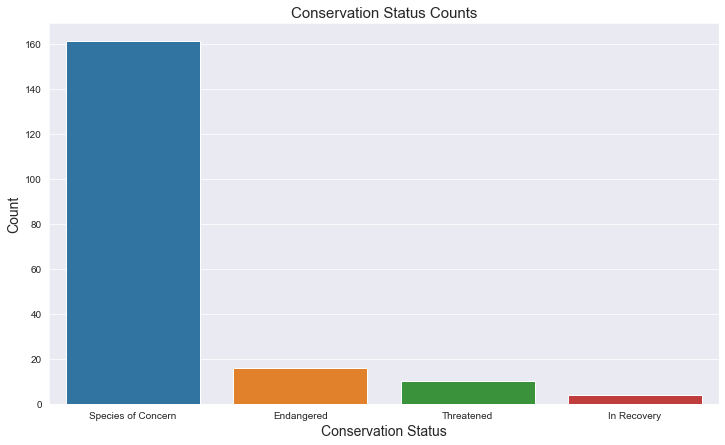

In [9]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,7))
sns.countplot(data=spec_df, x='conservation_status')
plt.title('Conservation Status Counts', size=15)
plt.xlabel('Conservation Status', size=14)
plt.ylabel('Count', size=14)
plt.savefig('status_counts.png')
plt.show()

In [10]:
# View the species that are endangered
endangered = spec_df[spec_df['conservation_status'] == 'Endangered']
endangered

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
34,Mammal,Myotis grisescens,Gray Myotis,Endangered
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered
72,Mammal,Glaucomys sabrinus coloratus,"Carolina Northern Flying Squirrel, Northern Fl...",Endangered
173,Bird,Grus americana,Whooping Crane,Endangered
276,Bird,Vermivora bachmanii,"Bachman's Warbler, Bachman's Wood Warbler",Endangered
343,Bird,Picoides borealis,Red-Cockaded Woodpecker,Endangered
540,Fish,Etheostoma percnurum,Duskytail Darter,Endangered
570,Fish,Noturus baileyi,Smoky Madtom,Endangered


In [11]:
# Threatened species?
threatened = spec_df[spec_df['conservation_status'] == 'Threatened']
threatened

,category,scientific_name,common_names,conservation_status
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened
490,Fish,Erimonax monachus,Spotfin Chub,Threatened
571,Fish,Noturus flavipinnis,Yellowfin Madtom,Threatened
704,Vascular Plant,Isotria medeoloides,Small Whorled Pogonia,Threatened
2562,Vascular Plant,Spiraea virginiana,Virginia Spiraea,Threatened
3032,Mammal,Ursus arctos horribilis,Grizzly Bear,Threatened
3283,Fish,Oncorhynchus mykiss,Rainbow Trout,Threatened
4597,Amphibian,Anaxyrus canorus,Yosemite Toad,Threatened
4600,Amphibian,Rana draytonii,California Red-Legged Frog,Threatened
4612,Fish,Oncorhynchus clarkii henshawi,Lahontan Cutthroat Trout,Threatened


In [12]:
# In recovery?
in_recovery = spec_df[spec_df['conservation_status'] == 'In Recovery']
in_recovery

,category,scientific_name,common_names,conservation_status
100,Bird,Haliaeetus leucocephalus,Bald Eagle,In Recovery
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
3143,Bird,Falco peregrinus anatum,American Peregrine Falcon,In Recovery
4565,Bird,Pelecanus occidentalis,Brown Pelican,In Recovery


### Conservation Status for Animals

In [13]:
# limit to animals
animals = spec_df[(spec_df['category'] != 'Vascular Plant') & (spec_df['category'] != 'Nonvascular Plant')]
# how many animals?
print(f"There are {len(animals)} animals in the data.")

There are 1021 animals in the data.


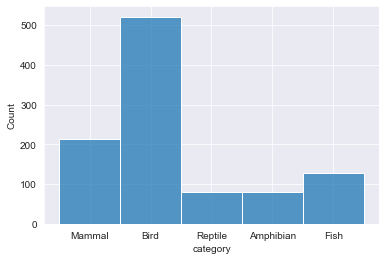

In [14]:
# Histogram for animals in the data
sns.histplot(data=animals, x='category')
plt.show()

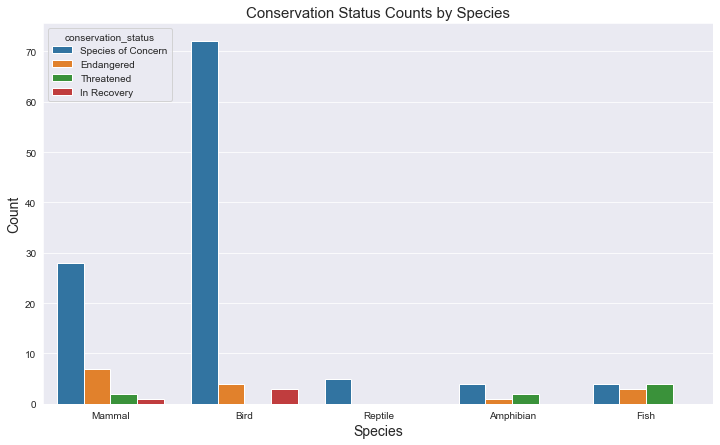

In [15]:
# Countplot showing animal categories and conservation status
plt.figure(figsize=(12, 7))
sns.countplot(data=animals, x='category', hue='conservation_status')
plt.title('Conservation Status Counts by Species', size=15)
plt.xlabel('Species', size=14)
plt.ylabel('Count', size=14)
plt.savefig('count_by_status.png')
plt.show()

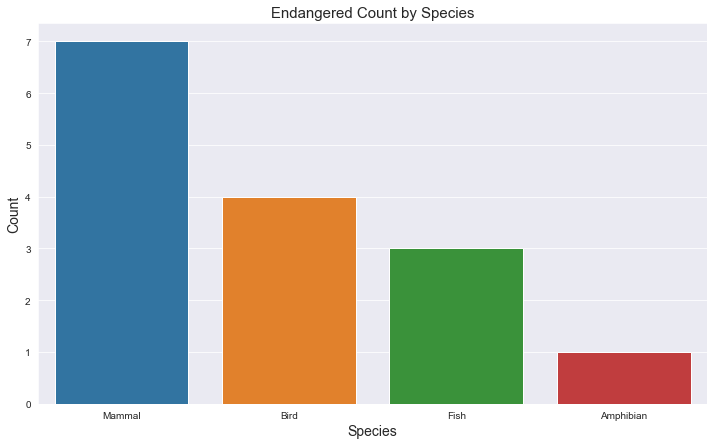

In [16]:
# Endangered Species Countplot
endangered_animals = animals[animals['conservation_status'] == 'Endangered']
plt.figure(figsize=(12,7))
sns.countplot(data=endangered_animals, x='category')
plt.title('Endangered Count by Species', size=15)
plt.xlabel('Species', size=14)
plt.ylabel('Count', size=14)
plt.savefig('endangered_by_species.png')
plt.show()

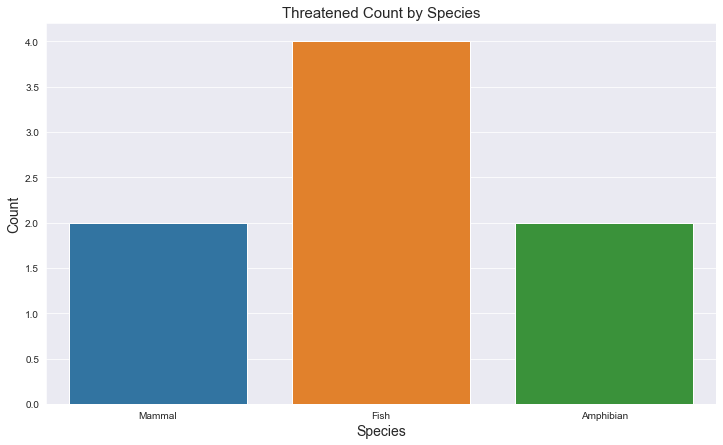

In [17]:
# Threatened Species Countplot
threatened_animals = animals[animals['conservation_status'] == 'Threatened']
plt.figure(figsize=(12,7))
sns.countplot(data=threatened_animals, x='category')
plt.title('Threatened Count by Species', size=15)
plt.xlabel('Species', size=14)
plt.ylabel('Count', size=14)
plt.savefig('threatened_by_species.png')
plt.show()

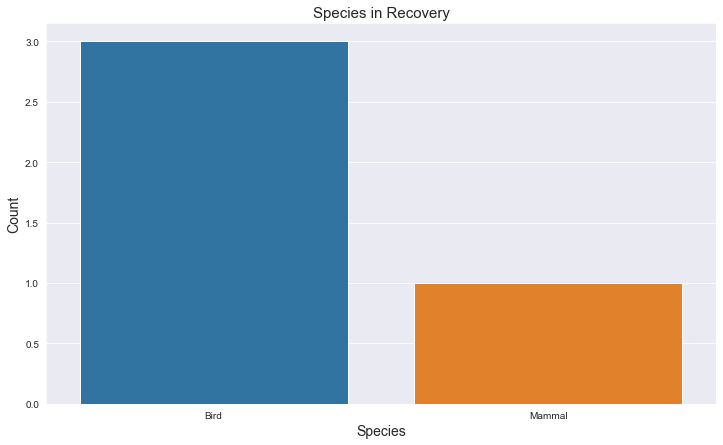

In [18]:
# Species in Recovery Countplot
in_recovery = animals[animals['conservation_status'] == 'In Recovery']
plt.figure(figsize=(12,7))
sns.countplot(data=in_recovery, x='category')
plt.title('Species in Recovery', size=15)
plt.xlabel('Species', size=14)
plt.ylabel('Count', size=14)
plt.savefig('in_recovery.png')
plt.show()

In [19]:
# What percentage of the species are endangered
endangered = len(spec_df[spec_df['conservation_status'] == 'Endangered'])
pct_endangered = round(endangered / len(animals), 4)
print(f"The percentage of species in the data that is endangered is {pct_endangered}")

The percentage of species in the data that is endangered is 0.0157


In [20]:
# What percentage are threatened?
threatened = len(spec_df[spec_df['conservation_status'] == 'Threatened'])
pct_threatened = round(threatened / len(animals), 4)
print(f"The percentage of species in the data that is endangered is {pct_threatened}")

The percentage of species in the data that is endangered is 0.0098


In [21]:
# What percentage is in recovery?
in_recovery = len(spec_df[spec_df['conservation_status'] == 'In Recovery'])
pct_in_recovery = round(in_recovery / len(animals), 4)
print(f"The percentage of species in the data that is in recovery is {pct_in_recovery}")

The percentage of species in the data that is in recovery is 0.0039


### Conclusion:

In this analysis I focused on endangered species to find out how many of our observations included animals that are endangered. As all animals are key to ecosystems, this is important to know. Fortunately, just under two percent (.0157) of the species are endangered. Even less (.0098 or close to 1 %) percent are threatened. Only a tiny percentage (.0039 or about four-tenths of a percent) are in recovery. Mammals (7 species) are the most likely to be endangered based on basic counts. Fish constitute the majority of the species that are threatened (4 species) and birds make up most of the species in recovery (3). While those are small numbers in a data set of 1021 animal species, it is still too many.